# High School Data

In [59]:
import numpy as np
import sys

data_2010_raw = np.loadtxt("./Data_2010.csv", dtype='string', delimiter=",")

high_data_raw = []
for i in range(len(data_2010_raw[0])):
    if "H" in data_2010_raw[i][1] and "NA" not in data_2010_raw[i][7] :
        high_data_raw.append(data_2010_raw[i])

high_data_raw = np.asarray(high_data_raw)
print high_data_raw.shape
print high_data_raw

(6, 36)
[['10' '"H"' '"ABRAHAM LINCOLN HIGH SCHOOL"' '880' '"DENVER COUNTY 1"' '""'
  '0' '5' '285' '3' '3' '5' '3' '2' '7' '7' '6' '7' '65.9' '3' '2' '1' '0'
  '0' '0' '0' '1930' '0.9326425' '2.9015544' '0.984456' '91.6580311'
  '3.1606218' '0.0518135' '0.3108808' '93' '0.785714']
 ['15' '"H"' '"ACADEMY OF CHARTER SCHOOLS"' '20'
  '"ADAMS 12 FIVE STAR SCHOOLS"' '""' '0' '6' '223' '6' '7' '6' '6' '5' '6'
  '6' '7' '5' '78.5' '3' '3' '2' '1' '0' '0' '0' '1306' '0.3062787'
  '2.5267994' '0.6891271' '25.0382848' '70.6738132' '0.1531394' '0.6125574'
  '15.5' 'NA']
 ['22' '"H"' '"LESTER R ARNOLD HIGH SCHOOL"' '30' '"ADAMS COUNTY 14"' '""'
  '0' '2' '338' '1' '3' '1' '2' '1' '3' '6' '1' '6' '34.1' 'NA' 'NA' '1'
  '0' '0' '0' '0' '160' '2.5' '0.625' '3.125' '76.25' '17.5' '0' '0' '51.3'
  'NA']
 ['24' '"H"' '"ADAMS CITY HIGH SCHOOL"' '30' '"ADAMS COUNTY 14"' '""' '0'
  '1' '337' '2' '3' '5' '3' '2' '1' '3' '3' '1' '69.8' '1' '2' '3' '0' '0'
  '0' '0' '1695' '0.9439528' '0.3539823' '3.3628319'

In [5]:
print high_data_raw[0][26] # total number of students
print high_data_raw[0][27] # start of the ethnicities
two_or_more_races = high_data_raw[0][33] # percent two or more race
reduced_lunches = high_data_raw[0][35] # free and reduced lunches
remediation = high_data_raw[0][35] # remediation


1930
0.9326425


In [32]:
#Using all the proportions
ethnic_sample = [7,27,28,29,30,31,32,33]

#Using just the white proportion
#ethnic_sample = [7,31]

ethnic_hs_data = high_data_raw[:,ethnic_sample]
print (ethnic_hs_data)

#hs_targets = ethnic_hs_data[:, 0]
#Daniel did this better
hs_targets = ethnic_hs_data[:,0].astype(float)
hs_features = ethnic_hs_data[:,1:].astype(float)

print hs_targets
print hs_features

[['5' '0.9326425' '2.9015544' '0.984456' '91.6580311' '3.1606218'
  '0.0518135' '0.3108808']
 ['6' '0.3062787' '2.5267994' '0.6891271' '25.0382848' '70.6738132'
  '0.1531394' '0.6125574']
 ['2' '2.5' '0.625' '3.125' '76.25' '17.5' '0' '0']
 ['1' '0.9439528' '0.3539823' '3.3628319' '81.5929204' '13.6873156' '0'
  '0.0589971']
 ['3' '1.061008' '1.3262599' '1.5915119' '25.729443' '68.1697613'
  '0.265252' '1.8567639']
 ['5' '1.5015015' '1.5015015' '27.027027' '35.1351351' '34.8348348' '0' '0']]
[ 5.  6.  2.  1.  3.  5.]
[[  9.32642500e-01   2.90155440e+00   9.84456000e-01   9.16580311e+01
    3.16062180e+00   5.18135000e-02   3.10880800e-01]
 [  3.06278700e-01   2.52679940e+00   6.89127100e-01   2.50382848e+01
    7.06738132e+01   1.53139400e-01   6.12557400e-01]
 [  2.50000000e+00   6.25000000e-01   3.12500000e+00   7.62500000e+01
    1.75000000e+01   0.00000000e+00   0.00000000e+00]
 [  9.43952800e-01   3.53982300e-01   3.36283190e+00   8.15929204e+01
    1.36873156e+01   0.00000000e+00

In [58]:
from sklearn.cross_validation import train_test_split
hs_features_train, hs_features_test, hs_target_train, hs_target_test = train_test_split(hs_features, hs_targets, test_size=0.33, random_state=42)
print(hs_features_train.shape)
print(hs_features_test.shape)
print(hs_target_train.shape)
print(hs_target_test.shape)

(4, 7)
(2, 7)
(4,)
(2,)


In [ ]:
# k nearest (may not be best since there are only 6 useable high school data entries)

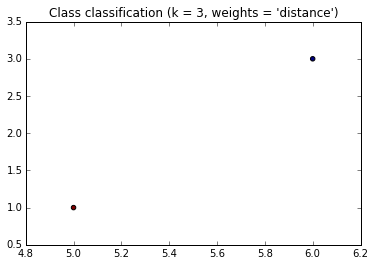

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

n_neighbors = 3

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(hs_features_train, hs_target_train)
    hs_pred = clf.predict(hs_features_test)
    
    colors = []

    colors = (abs(hs_target_test - hs_pred))
    
    %matplotlib inline
    
    plt.figure()
    plt.scatter(hs_target_test, hs_pred, c= colors)

    # Plot also the training points
    plt.title("Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

[[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]]


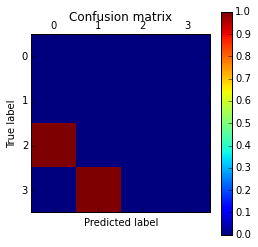

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(hs_target_test, hs_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [66]:
from sklearn import metrics 
#Computing various score metrics ( adapted from Daniel's adaptation of an example provided by scikit-learn)

trueLabel = hs_target_test
predLabel = hs_pred

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 1.000000
V measure score : 1.000000
Adjusted Mutual Info score : 1.000000
Mutual Info score : 0.693147


# Naive Bayes

In [68]:
from sklearn import naive_bayes
from sklearn import metrics

gnb = naive_bayes.GaussianNB()
gnb.fit(hs_features_train,hs_target_train)
predict_c = gnb.predict(hs_features_test)

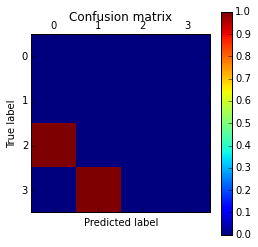

In [70]:
cm = confusion_matrix(hs_target_test, predict_c)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = ee_target_test
predLabel = predict_c

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

# For next week: incorporate 2011 and 2012 data as well to improve sample size 